In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.cm as cm
import copy

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5
# plt.rcParams['axes.facecolor']='#E7E8E9'

In [2]:
MitoCarta3_file = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Data_Library/MITOCARTA3.0/Mouse.MitoCarta3.0.xls'
MitoCarta = pd.read_excel(MitoCarta3_file, 'A Mouse MitoCarta3.0')
MitoPW = pd.read_excel(MitoCarta3_file, 'C MitoPathways')

name2ID = MitoCarta[['Symbol','EnsemblGeneID']].set_index('Symbol')['EnsemblGeneID'].to_dict()

MitoPW['PW level'] = MitoPW['MitoPathway Hierarchy'].str.split('>').str.len()
MitoPW['gene_ids'] = ''
for i in range(len(MitoPW)):
    for gene in MitoPW.iloc[i,:]['Genes'].split(', '):
        if type(name2ID[gene]) == float : continue
        MitoPW['gene_ids'][i] += name2ID[gene].replace('|',',') + ','
    MitoPW['gene_ids'][i] = MitoPW['gene_ids'][i][:-1]
MitoPW = MitoPW.set_index('MitoPathway',drop=True)

mtDNA = MitoCarta[['Symbol','EnsemblGeneID']]
mtDNA = mtDNA[mtDNA['Symbol'].str.startswith('mt-')].reset_index(drop=True)
mtDNA = mtDNA.rename(columns={'Symbol':'gene_name', 'EnsemblGeneID':'gene_id'})[['gene_id']]

/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_25440/466202503.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MitoPW['gene_ids'][i] += name2ID[gene].replace('|',',') + ','
/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_25440/466202503.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MitoPW['gene_ids'][i] = MitoPW['gene_ids'][i][:-1]


In [3]:
TCA = pd.DataFrame({'gene_id' : MitoPW.loc['TCA cycle','gene_ids'].split(',')})  
# display(TCA)

---

In [4]:
RNA = pd.read_csv(f'{Project}/Results/Tables/CPM_RD_calculation/v20221217/adi_RNA_avg_log2FC.tsv', sep='\t').drop(columns='gene_name')

table = {}
table['RNA'] = RNA

display(table['RNA'])

,gene_id,R4,R8
0,ENSMUSG00000033845,1.919982,2.397623
1,ENSMUSG00000025903,0.564052,0.894128
2,ENSMUSG00000033813,-0.823592,0.210519
3,ENSMUSG00000033793,0.192070,-0.043765
4,ENSMUSG00000025907,-0.130110,0.328257
...,...,...,...
12206,ENSMUSG00000064360,1.702209,3.022970
12207,ENSMUSG00000064363,1.677543,2.216408
12208,ENSMUSG00000064367,1.287624,1.643277
12209,ENSMUSG00000064368,1.477040,2.066885


In [5]:
RNA = pd.read_csv(f'{Project}/Results/Other_papers/Reid_etal.2017.Scientific_Reports/Tables/Exp_calc/v20230826/Reid_RNA_avg_log2FC.tsv', sep='\t').drop(columns='gene_name')

table['Reid_RNA'] = RNA

display(table['Reid_RNA'])

,gene_id,R_BD5,R_WD5
0,ENSMUSG00000051951,-2.880399,-1.182950
1,ENSMUSG00000033845,1.867688,1.890634
2,ENSMUSG00000025903,1.189451,0.326595
3,ENSMUSG00000033813,0.036676,-1.075665
4,ENSMUSG00000033793,-0.123633,0.071399
...,...,...,...
12135,ENSMUSG00000065947,3.606454,0.673563
12136,ENSMUSG00000064363,2.520375,1.027431
12137,ENSMUSG00000064367,2.415292,0.981886
12138,ENSMUSG00000064368,3.015609,1.114483


In [6]:
CHIP = pd.read_csv('/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Data_Library/GSEA/chip/Mouse_Ensembl_Gene_ID_MSigDB.v2022.1.Mm.chip', sep='\t', usecols=['Probe Set ID','Gene Symbol']).rename(columns={'Probe Set ID':'gene_id','Gene Symbol':'gene_name'})

In [7]:
data_dict = {}

data = pd.merge(table['RNA'], table['Reid_RNA'], on='gene_id', how='outer')
data = pd.merge(CHIP, data, on='gene_id')

order = [
    'Cs', # Citrate synthase
    
    'Aco2', # Aconitase
    
    'Idh2',
    'Idh3a',
    'Idh3b',
    'Idh3g',

    'Dld',
    'Dlst',
    'Ogdh',
    'Ogdhl',

    'Sucla2',
    'Suclg1',
    'Suclg2',

    'Sdha',
    'Sdhb',
    'Sdhc',
    'Sdhd',

    'Fh1',

    'Mdh2'
]


# data_dict['TCA'] = pd.merge(TCA, data, on='gene_id', how='left')
TCA_data = pd.merge(pd.DataFrame({'gene_name':order}), data, on='gene_name', how='left')
display(TCA_data)

,gene_name,gene_id,R4,R8,R_BD5,R_WD5
0,Cs,ENSMUSG00000005683,2.913839,3.401190,3.511430,3.565587
1,Aco2,ENSMUSG00000022477,3.949530,3.816783,5.071945,5.112324
2,Idh2,ENSMUSG00000030541,0.625048,1.597376,2.399254,1.335647
3,Idh3a,ENSMUSG00000032279,4.094750,4.463340,4.428824,3.910283
4,Idh3b,ENSMUSG00000027406,2.823380,3.321403,3.756163,3.590202
5,Idh3g,ENSMUSG00000002010,2.808553,3.150534,3.534431,3.257290
6,Dld,ENSMUSG00000020664,2.652403,2.697204,2.990438,2.535055
7,Dlst,ENSMUSG00000004789,2.726746,2.740516,2.513359,2.710175
8,Ogdh,ENSMUSG00000020456,2.636316,2.456768,3.133641,3.475381
9,Ogdhl,ENSMUSG00000021913,-1.394782,-2.965241,-3.474432,-3.143875


In [11]:
data_dict = {
    'Cs' : TCA_data.iloc[[0]],
    'Aco' : TCA_data.iloc[[1]],
    'Idh' : TCA_data.loc[2:5,:],
    'Akdh' : TCA_data.loc[6:9,:],
    'Sucl' : TCA_data.loc[10:12,:],
    'Sdh' : TCA_data.loc[13:16,:],
    'Fh' : TCA_data.iloc[[17]],
    'Mdh' : TCA_data.iloc[[18]]
}
# display(data_dict)

----

/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_25440/280531630.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  using_cm = copy.copy(cm.get_cmap("RdBu_r"))


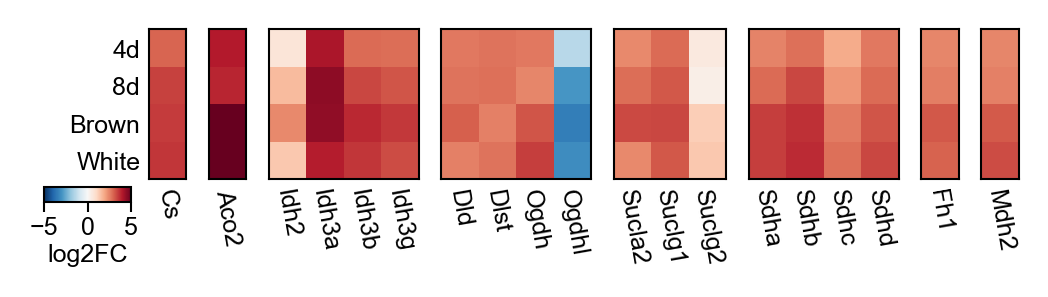

In [16]:
using_cm = copy.copy(cm.get_cmap("RdBu_r"))
using_cm.set_bad('darkgray',1.)

sF = 1 # Size factor
wgap = 0.075
hgap = 0.1
nrow, ncol = 1, len(data_dict)

width_ratios = np.array([len(data_dict[Ez])/4 for Ez in data_dict]) / 2
height_ratios = np.array([1]) / 2

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)
row = 0
col = 0
for Ez in data_dict:
    ax = fig.add_subplot(grid[row,col])

    plot_data = data_dict[Ez].drop(columns='gene_id').set_index('gene_name', drop=True).T
    heat1 = ax.pcolormesh(plot_data[::-1],
                          cmap=using_cm, vmin=-5, vmax=5)

    ax.set_xticks([i+0.5 for i in range(len(plot_data.columns))])
    ax.set_yticks([]) 
    ax.set_xticklabels(plot_data.columns, rotation=-80, ha='center')
    ax.tick_params(length=0, pad=2)
    # ax.tick_params(width=0.5, length=3, pad=1)

    if col==0:
        ax.set_yticks([i+0.5 for i in range(len(plot_data))][::-1]) 
        ax.set_yticklabels(['4d','8d','Brown','White'])

        # cbar = plt.colorbar(heat1, ax=ax, cax = ax.inset_axes([-0.22, -0.2, 0.2, 0.1]), orientation='horizontal')
        cbar = plt.colorbar(heat1, ax=ax, cax = fig.add_axes([-0.12, -0.15, 0.1, 0.1]), orientation='horizontal')
        cbar.ax.set_xlabel('log2FC', labelpad=1, fontsize=6)
        cbar.ax.set_xticks([-5,0,5])
        cbar.ax.tick_params(width=0.5, length=2.5, pad=1)

    col+=1


plt.savefig('comp_TCA_RNAlogFC_heatmap.pdf', bbox_inches='tight')
plt.show()
plt.close()